
# 🌾Crop Disease Detection Using MobileNetV2 (Deep Learning Approach)

This project aims to detect crop diseases from leaf images using a deep learning model built on MobileNetV2.  
The model is trained on the **PlantVillage Dataset** and is designed for **efficient and accurate classification** of multiple disease categories across crops like tomato, potato, and corn.

## 📌 Key Features
- **Transfer Learning** with MobileNetV2
- **Image Augmentation** to improve generalization
- **Performance Visualization** (accuracy/loss curves, confusion matrix)
- **Potential for Deployment** via Streamlit or mobile interface

---

**Dataset Source:** [Kaggle - PlantVillage Dataset](https://www.kaggle.com/datasets/emmarex/plantdisease)  
**Framework:** TensorFlow / Keras  
**Author:** Rohan Bose  
**Event:** Deep Learning Summer School 2025 – PDPM IIITDM Jabalpur


In [6]:
# Mount Google Drive (recommended)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
!pip install tensorflow matplotlib


In [8]:
DATA_DIR = '/content/drive/MyDrive/PlantVillage'


Found 11148 images belonging to 16 classes.
Found 2782 images belonging to 16 classes.
Epoch 1/5
349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4803 - loss: 1.7128

349/349 ━━━━━━━━━━━━━━━━━━━━ 3089s 9s/step - accuracy: 0.4807 - loss: 1.7114 - val_accuracy: 0.7739 - val_loss: 0.7370
Epoch 2/5
349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7912 - loss: 0.6648

349/349 ━━━━━━━━━━━━━━━━━━━━ 630s 2s/step - accuracy: 0.7912 - loss: 0.6647 - val_accuracy: 0.8318 - val_loss: 0.5481
Epoch 3/5
349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8397 - loss: 0.5133

349/349 ━━━━━━━━━━━━━━━━━━━━ 648s 2s/step - accuracy: 0.8397 - loss: 0.5132 - val_accuracy: 0.8454 - val_loss: 0.4789
Epoch 4/5
349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8659 - loss: 0.4351

349/349 ━━━━━━━━━━━━━━━━━━━━ 581s 2s/step - accuracy: 0.8659 - loss: 0.4351 - val_accuracy: 0.8551 - val_loss: 0.4364
Epoch 5/5
349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8707 - loss: 0.4058

349/349 ━━━━━━━━━━━━━━━━━━━━ 598s 2s/step - accuracy: 0.8707 - loss: 0.4058 - val_accuracy: 0.8666 - val_loss: 0.3912


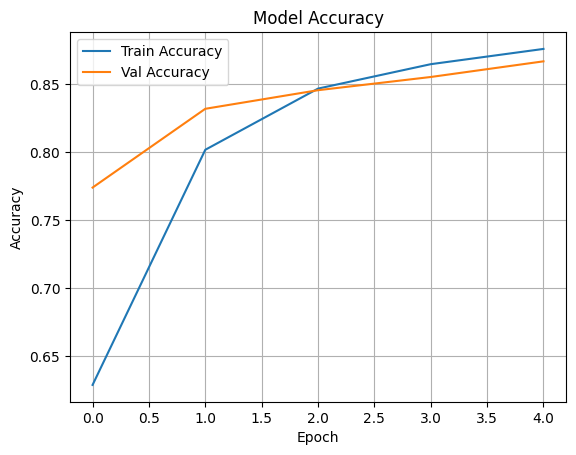

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 5
DATA_DIR = "/content/drive/MyDrive/PlantVillage"
SAVE_DIR = "/content/drive/MyDrive/CropDiseaseModel"

# Create save directory if it doesn't exist
os.makedirs(SAVE_DIR, exist_ok=True)

# Data loader
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical'
)

# Model setup
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(os.path.join(SAVE_DIR, 'best_model.h5'), save_best_only=True, monitor='val_accuracy')
earlystop = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

# Train the model
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=[checkpoint, earlystop]
)

# Save final model in Drive
model.save(os.path.join(SAVE_DIR, "crop_disease_model.h5"))

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
model.save("my_model.keras")


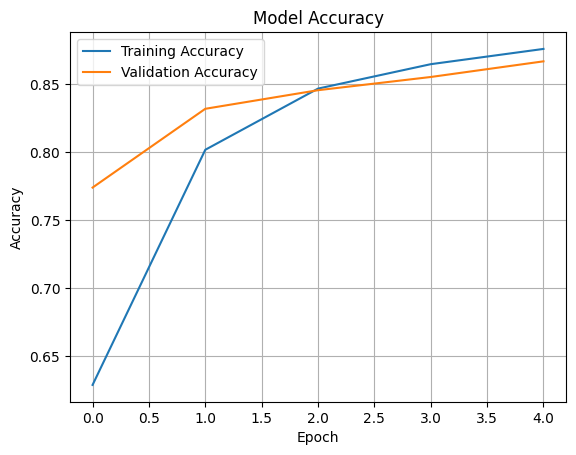

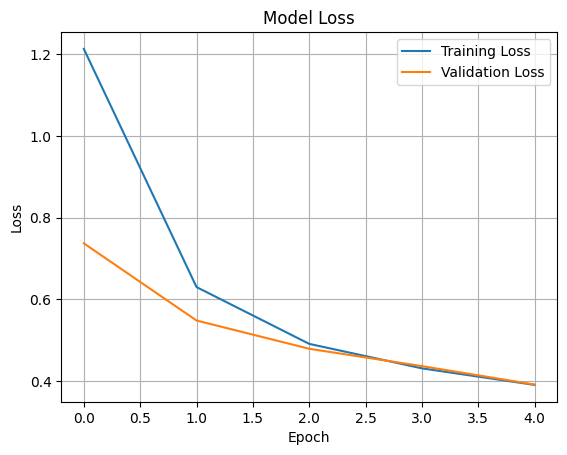

In [13]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


87/87 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (16).

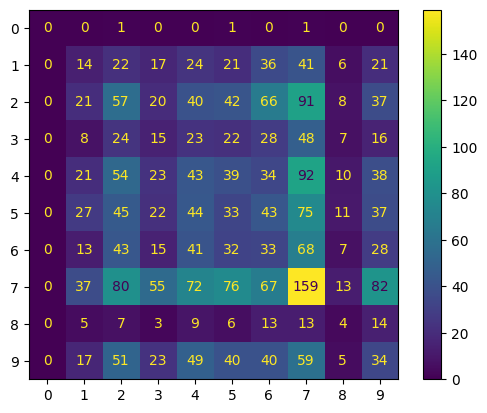

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions on the full validation set
val_gen.reset()  # Reset the generator
Y_pred = model.predict(val_gen, steps=len(val_gen), verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_gen.classes

# Ensure label names match the order in confusion matrix
labels = list(val_gen.class_indices.keys())

# Compute and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step


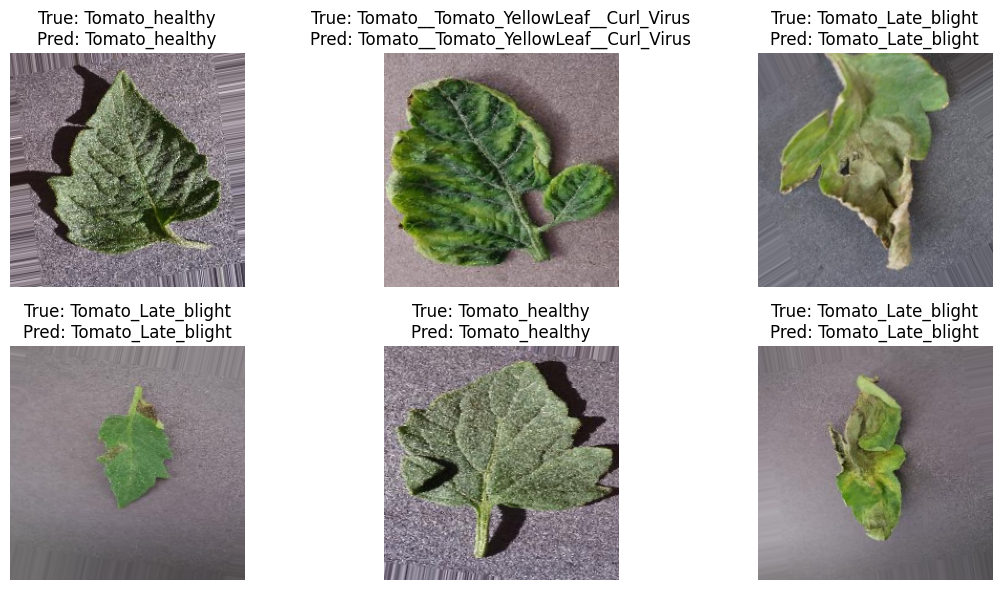

In [25]:
class_names = list(val_gen.class_indices.keys())
x_batch, y_batch = next(val_gen)
y_pred_batch = model.predict(x_batch)
pred_classes = np.argmax(y_pred_batch, axis=1)

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.title(f"True: {class_names[np.argmax(y_batch[i])]}\nPred: {class_names[pred_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
